# Reduce maintenance cost through predictive techniques

## Background
Company (3D Technologies) has a fleet of devices transmitting daily aggregated telemetry
attributes.
Predictive maintenance techniques are designed to help determine the condition of in-service
equipment in order to predict when maintenance should be performed. This approach
promises cost savings over routine or time-based preventive maintenance, because tasks are
performed only when warranted.
## Goal
You are tasked with building a predictive model using machine learning to predict the
probability of a device failure. When building this model, be sure to minimize false positives and
false negatives. The column you are trying to predict is called failure with binary value 0 for
non-failure and 1 for failure.

## Data

Download link: http://aws-proserve-data-science.s3.amazonaws.com/device_failure.csv

columns :
date -> YYYY-MM-DD format
device -> device did 
failure  ->non-failure is 0, failure is 1
attribute1 - attribute9 - >  daily aggregated telemetry



### 1. Data exploration

In [1]:
# get the data from the source 
!wget http://aws-proserve-data-science.s3.amazonaws.com/device_failure.csv



--2020-06-07 11:54:55--  http://aws-proserve-data-science.s3.amazonaws.com/device_failure.csv
Resolving aws-proserve-data-science.s3.amazonaws.com (aws-proserve-data-science.s3.amazonaws.com)... 52.218.249.82
Connecting to aws-proserve-data-science.s3.amazonaws.com (aws-proserve-data-science.s3.amazonaws.com)|52.218.249.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6856222 (6,5M) [text/csv]
Saving to: ‘device_failure.csv.14’

device_failure.csv. 100%[===================>]   6,54M  2,05MB/s    in 3,2s    

2020-06-07 11:54:59 (2,05 MB/s) - ‘device_failure.csv.14’ saved [6856222/6856222]



In [2]:
import pandas as pd
import numpy as np
device_df =  pd.read_csv('device_failure.csv', encoding = "ISO-8859-1")
device_df.head(4)

device_df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


/home/leo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ea9a09b0>,
      dtype=object)

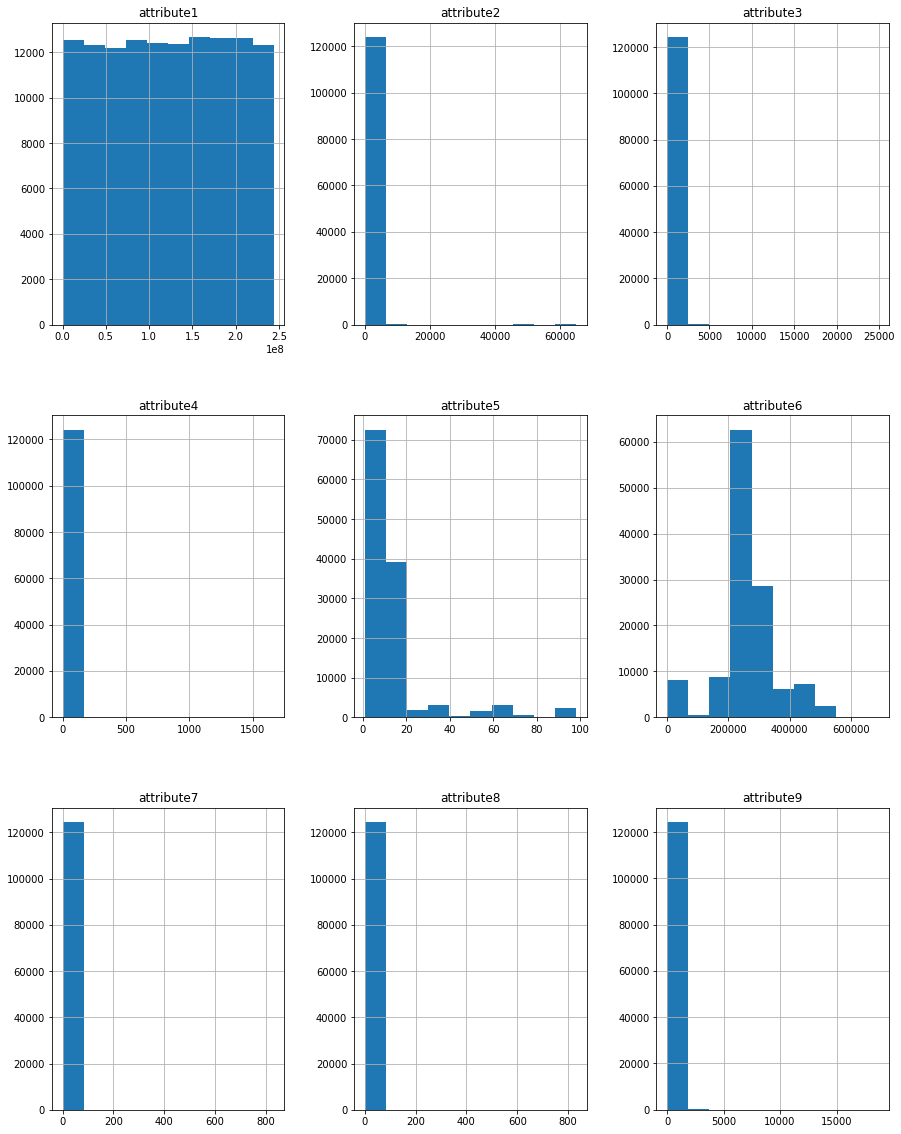

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
attributes = ['attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'] 

device_df.hist(attributes, ax = ax)

In [4]:
print('failure mean ', device_df['failure'].mean())
for atribute_name in   [ 'attribute2', 'attribute3',
       'attribute4',  'attribute7', 'attribute8',
       'attribute9'] :
    
    print('Failure mean for the 100 largest of {}: {} '.format( atribute_name, device_df.loc[device_df[atribute_name].nlargest(200).index]['failure'].mean() ))



failure mean  0.000851446656063746
Failure mean for the 100 largest of attribute2: 0.025 
Failure mean for the 100 largest of attribute3: 0.0 
Failure mean for the 100 largest of attribute4: 0.025 
Failure mean for the 100 largest of attribute7: 0.08 
Failure mean for the 100 largest of attribute8: 0.08 
Failure mean for the 100 largest of attribute9: 0.0 


[Text(0.5, 1.0, ' Distributiuon of the 200 largest  attribute2')]

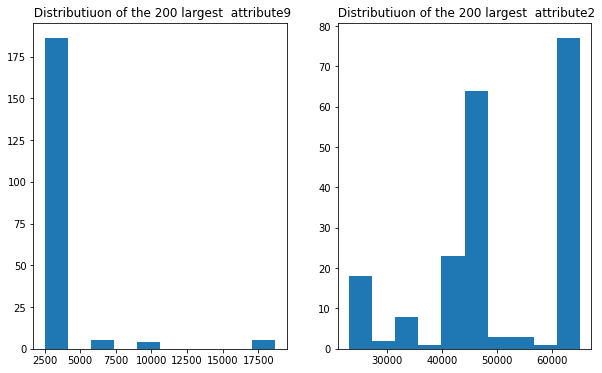

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))    
axes[0].hist(device_df['attribute9'].nlargest(200))
axes.flat[0].set( title=' Distributiuon of the 200 largest  attribute9')

axes[1].hist(device_df['attribute2'].nlargest(200))
axes.flat[1].set( title=' Distributiuon of the 200 largest  attribute2')


            

### The outliers of the  attributes 4, 7and 8  are strongly corelated to the failure, and these values can mean that something is wrong with the device






Number of failure: 106   Number of  not failure: 124388 |rate 1173
Number of devices :  1169
Number of devices failure :  106
Devices  with less than 10 samples 
W1F0PNA5    9
Z1F1AG5N    9
Z1F0M7QD    9
S1F0QZXV    9
S1F0TNYF    7
Name: device, dtype: int64


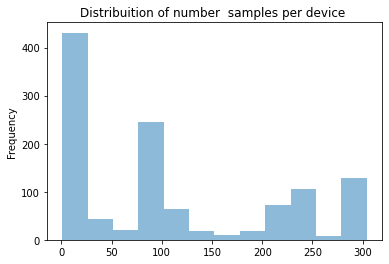

In [6]:
print('Number of failure: {}   Number of  not failure: {} |rate {:.0f}'.format(device_df[device_df['failure'] ==1 ].shape[0], device_df[device_df['failure'] ==0 ].shape[0], 
                                                                              (device_df[device_df['failure'] ==0 ].shape[0] / device_df[device_df['failure'] ==1 ].shape[0]  )  ))


print('Number of devices : ', len(device_df.device.unique()))
device_failure = device_df[device_df['failure'] ==1 ] 
print('Number of devices failure : ', len(device_failure.device.unique()))
histdevice = device_df.device.value_counts()
ax = histdevice.plot.hist(bins=12, alpha=0.5, title = "Distribuition of number  samples per device ")


print('Devices  with less than 10 samples ')
print(histdevice[histdevice < 10].head())



/home/leo/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Correlation Matrix


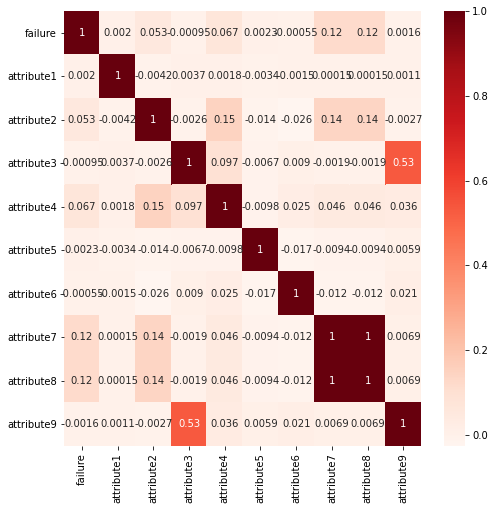

In [7]:
import seaborn as sns
plt.figure(figsize=(8,8))
notascoora = device_df.corr()
sns.heatmap(notascoora, annot=True, cmap=plt.cm.Reds)
print('Correlation Matrix')
plt.show()   


In [8]:
device_df[device_df['attribute7']  !=device_df['attribute8'] ]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9


### Data explore conclusions
   - The dataset is time series about failure of multiple devices. 
   - The two classes in the dataset failure and not failure is extremely unbalanced, for each failure there are 1173 not failure. 
   - The number of samples per device is incostant
   - The values of the Attribute7  and attribute8 are the same. 
   - The outliers of the  attributes 4, 7 and 8  are strongly corelated to the failure, and these values could  indicatethat something is wrong with the device.
  

## Feature engineering


### Lag features aproche 

The Lag feature is a classic technique for time series prediction problems. The simplest approach is add previous features (t-1), (t-2) .. to each sample in time (t).


In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
device_df =  pd.read_csv('device_failure.csv', encoding = "ISO-8859-1")

# number of lags fetures in the windows
number_lags = 7

device_df["date"] = pd.to_datetime(device_df["date"])
device_df["day_week"] = device_df['date'].dt.dayofweek 

# since attribute8 = attribute7, one of them can be discarded
device_df = device_df.drop(['attribute8'], axis=1)

device_names = device_df.device.unique().tolist()

In [10]:


# add lgs features to each row to create a device's data set
def get_device_dataste(device_name, device_df):
    device_df =  device_df[device_df['device'] ==   device_name]
   
    column_names =['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', 'attribute6', 'attribute7',  'attribute9']

    for column_name in column_names:
        for i in range(1, number_lags +1):
            coluna_lag = column_name+'_'+ str((i) )
            device_df[coluna_lag] = device_df[column_name].shift(i)


    device_df['failure_f'] = device_df['failure'].shift(-1)
    device_df.drop(device_df.tail(1).index,inplace=True)
    
    # discart the fists columns
    if device_df.shape[0]  < number_lags +1 : 
        device_df  = device_df.tail(1)
    else:
        device_df  = device_df.tail( device_df.shape[0] - number_lags )
    device_df.fillna(0)
    device_df = device_df.drop(['date', 'device', 'failure'], axis=1)
    return device_df



device_data = get_device_dataste(device_names[0], device_df)
for device_name in device_names[1:]:
    data_temp = get_device_dataste(device_name, device_df)
    device_data = pd.concat([device_data, data_temp])
    
    
    

In [11]:
#  Let's check the correlation in 
import seaborn as sns
import matplotlib.pyplot as plt

def print_correlation(lag):
    column_names =[ 'failure_f']
    for i in range(1, 10):
        if i != 8 :
            column_name = 'attribute' + str(i)
            if lag > 0 :
                column_name = column_name + '_' + str(lag)
            column_names.append(column_name)  
        
    device_data_one_lag =  device_data[column_names]
    ## calcula matriz de correlacao 

    
    coora = device_data_one_lag.corr()
    return coora

    
    
    
coora= print_correlation(0)
print("Failure  coorelation of features with no lag ")
coora.head(1)


Failure  coorelation of features with no lag 


,failure_f,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
failure_f,1.0,0.001272,0.047923,-0.001178,0.067709,0.001946,-0.001089,0.114084,0.002529


In [12]:
coora= print_correlation(3)
print("Failure  coorelation of features with 3  lags")
coora.head(1)

Failure  coorelation of features with 3  lags


,failure_f,attribute1_3,attribute2_3,attribute3_3,attribute4_3,attribute5_3,attribute6_3,attribute7_3,attribute9_3
failure_f,1.0,-0.001459,0.036124,-0.001311,0.055209,0.001846,-0.001152,0.050769,0.002578


In [13]:
split_rate =0.2
device_data_f = device_data[device_data['failure_f'] ==1]  
print(device_data_f.shape)

device_data__not_f = device_data[device_data['failure_f'] ==0]  
print(device_data__not_f.shape)

print(' Unbalance data rate {:.2f}  !!'.format( device_data__not_f.shape[0]/ device_data_f.shape[0]))

from sklearn.model_selection import train_test_split
train_failure, test_failure = train_test_split(device_data_f, test_size=split_rate)
train_not_failure, test_not_failure = train_test_split(device_data__not_f, test_size=split_rate)


failure_train_size =  train_failure.shape[0] * 4
failure_train_size

(106, 66)
(116193, 66)
 Unbalance data rate 1096.16  !!


336

### Resampling
 A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling). 
Since, the rate of imbalance in our dataset is hight   we adopted the two techniques together. Under-sampling the class of 'no failure'  and over-sampling the 'failure' class
As there are few points of failure, we adopt an integer as over-sampling rate in order to use the same weight for each point of failure during the training.


In [14]:
train_not_failure = train_not_failure.sample(n=failure_train_size, random_state=1)
train_failure = train_failure.sample(n=failure_train_size, random_state=1, replace=True)

final_train = pd.concat([train_failure, train_not_failure])
final_test = pd.concat([test_failure, test_not_failure])
print(final_train.shape)
print(final_test.shape)
print("Nuber of falures in the dataset test: ",  test_failure.shape[0])


(672, 66)
(23261, 66)
Nuber of falures in the dataset test:  22


## Resolvers 

### Classifier   candidates 
    1. Linerar Algorithms  ->  SVD is efficient and Versatile.  
    2. Neuron network - LSTM is a good candidate to solve time series problems, whenever I didn't  achieve goods results using this technique, probability because the dataset has few points of failure.
    3. Decision Tree - could be too simple for the problem. *
    4.  Ensemble methods appears to be more aproprieted,  Randow florest and GradientBoosting are good options.   
    
* in order  to keep the document concise,the LSTM code is not in this notebook

In [15]:
## useful functions

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


#transfom the pandasFrame to x, y for train
def getDataset(df):
    df= df.dropna()
    label = df['failure_f'].values 
    X = df.drop(['failure_f'], axis = 1)
    Xmatrix = X.values
    return Xmatrix, label

x_train, label_train = getDataset(final_train)
x_test,  label_test = getDataset(final_test)


    
def printAcuracyDetail(classificador, x, true_label ):
    predicted_label = classificador.predict(x) 
    confu = confusion_matrix(true_label, predicted_label)
    TP = confu[1][1]
    TN = confu[0][0]
    FP = confu[0][1]
    FN = confu[1][0]
    

    accuracy =  accuracy_score(true_label, predicted_label)
    falures  = np.count_nonzero(true_label == 1)
    not_falures  = np.count_nonzero(true_label == 0)
    # https://en.wikipedia.org/wiki/Precision_and_recall   
    # true positive rate = TP / (TP  + FN) 
    # False positive rate = FP / (FP  + TN) 
    # False Negative Rate = FN ( FN + TP)
    # True Negative Rate = TN/ (TN +FP )
    TP_rate = TP / (TP  + FN) 
    FP_rate = FP / (FP  + TN) 
    FN_rate = FN / (FN +TP )
    TN_rate = TN / ( TN +FP )
    
    print('         -Total acuracy {:.3f}%'.format( accuracy* 100 ))
    print('         -True  positives  {} | True positive rate   {:.3f}%'.format(TP, TP_rate * 100  ))
    print('         -False positives  {} | False positive rate  {:.3f}%'.format(FP, FP_rate * 100 ))
    print('         -True  negatives  {} | True negatives rate  {:.3f}% '.format(TN, TN_rate* 100 ))
    print('         -False negatives  {} | False negatives rate {:.3f}% '.format(FN, FN_rate* 100 ))
    

def getF1Acuracy(classificador, x, y_true ):
    y_pret_treino = classificador.predict(x) 
    f1_s = f1_score(y_true, y_pret_treino, average='macro')  
    return f1_s





In [16]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC

#svm_classificlf = svm.SVC()
svm_classificlf = svm.SVC(kernel='rbf')
#svm_classificlf = make_pipeline(StandardScaler(), NuSVC())

svm_classificlf.fit(x_train, label_train)

trainf1=  getF1Acuracy( svm_classificlf, x_train, label_train)



print("     train Acuracy {:.2f} testes Acuracy {:.2f}   ".format(svm_classificlf.score(x_train, label_train) , svm_classificlf.score(x_test, label_test)) )
print("     train F1-Score {:.2f} teste F1-Score {:.2f} ".format(getF1Acuracy( svm_classificlf, x_train, label_train) , getF1Acuracy( svm_classificlf, x_test, label_test)) )

    

print("\n     Results for the train dataset  ")
printAcuracyDetail(svm_classificlf,x_train , label_train )
print("\n     Results for the test dataset  ")
printAcuracyDetail(svm_classificlf,x_test , label_test )





     train Acuracy 0.69 testes Acuracy 0.68   
     train F1-Score 0.69 teste F1-Score 0.41 

     Results for the train dataset  
         -Total acuracy 69.008%
         -True  positives  217 | True positive rate   67.812%
         -False positives  100 | False positive rate  29.851%
         -True  negatives  235 | True negatives rate  70.149% 
         -False negatives  103 | False negatives rate 32.188% 

     Results for the test dataset  
         -Total acuracy 68.331%
         -True  positives  8 | True positive rate   36.364%
         -False positives  7329 | False positive rate  31.638%
         -True  negatives  15836 | True negatives rate  68.362% 
         -False negatives  14 | False negatives rate 63.636% 


In [17]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# funcap para calcula f1-dcore
from sklearn.metrics import f1_score

def boostingGridResolve(X_train, y_train, X_test, y_test):
    
    parameters = {
        "learning_rate": [ 0.05, 0.1],
            "max_depth":[ 2, 4, 6],
        "subsample":[0.4 ],
        "n_estimators":[  10, 15]
    }
    
    clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1)
    clf.fit(X_train, y_train)
    trainf1=  getF1Acuracy( clf, X_train, y_train)
    trainf1_teste=  getF1Acuracy( clf, X_test, y_test)
    
    print("     train Acuracy {:.2f} testes Acuracy {:.2f}   ".format(clf.score(X_train, y_train) , clf.score(X_test, y_test)) )
    print("     train F1-Score {:.2f} teste F1-Score {:.2f} ".format(getF1Acuracy( clf, X_train, y_train) , getF1Acuracy( clf, X_test, y_test)) )
    print("best_params_",   clf.best_params_)
    
    return clf , trainf1



GB_Classifier ,trainf1 =  boostingGridResolve(x_train, label_train,x_test, label_test  )

print("\n     Results for the train dataset  ")
printAcuracyDetail(GB_Classifier,x_train , label_train )
print("\n     Results for the test dataset  ")
printAcuracyDetail(GB_Classifier,x_test , label_test )




     train Acuracy 0.98 testes Acuracy 0.93   
     train F1-Score 0.98 teste F1-Score 0.49 
best_params_ {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 15, 'subsample': 0.4}

     Results for the train dataset  
         -Total acuracy 98.015%
         -True  positives  310 | True positive rate   96.875%
         -False positives  3 | False positive rate  0.896%
         -True  negatives  332 | True negatives rate  99.104% 
         -False negatives  10 | False negatives rate 3.125% 

     Results for the test dataset  
         -Total acuracy 93.022%
         -True  positives  17 | True positive rate   77.273%
         -False positives  1613 | False positive rate  6.963%
         -True  negatives  21552 | True negatives rate  93.037% 
         -False negatives  5 | False negatives rate 22.727% 


-Total acuracy 91.134%
         -True  positives  17 | True positive rate   80.952%
         -False positives  2052 | False positive rate  8.857%
         -True  negatives  21117 | True negatives rate  91.143% 
         -False negatives  4 | False negatives rate 19.048% 
100, 

In [24]:

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def randonForestResolve(X_train, y_train, X_test, y_test ):
    from sklearn.model_selection import GridSearchCV
    
    
    # Set the parameters by cross-validation
    parameters = {'n_estimators': [   100, 150], 
                  'max_depth': [ 5, 10],
                  'min_samples_split': [0.1, 0.4],
                  'min_samples_leaf': [1, 3]
                 }

    
    clf = GridSearchCV(ensemble.RandomForestClassifier(), parameters, cv=5,  n_jobs=-1, verbose=1)
    
    
    clf.fit(X_train, y_train)
    
    
    print("     train Acuracy {:.2f} testes Acuracy {:.2f}   ".format(clf.score(X_train, y_train) , clf.score(X_test, y_test)) )
    print("     train F1-Score {:.2f} teste F1-Score {:.2f} ".format(getF1Acuracy( clf, X_train, y_train) , getF1Acuracy( clf, X_test, y_test)) )
    print("best_params_",   clf.best_params_)
    
    
    
    return clf

rf_classificatior =  randonForestResolve(x_train, label_train,x_test, label_test  )
print("\n     Results for the train dataset  ")
printAcuracyDetail(rf_classificatior,x_train , label_train )
print("\n     Results for the test dataset  ")
printAcuracyDetail(rf_classificatior,x_test , label_test )





Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.8s finished


     train Acuracy 0.90 testes Acuracy 0.91   
     train F1-Score 0.90 teste F1-Score 0.49 
best_params_ {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'n_estimators': 150}

     Results for the train dataset  
         -Total acuracy 89.618%
         -True  positives  280 | True positive rate   87.500%
         -False positives  28 | False positive rate  8.358%
         -True  negatives  307 | True negatives rate  91.642% 
         -False negatives  40 | False negatives rate 12.500% 

     Results for the test dataset  
         -Total acuracy 91.120%
         -True  positives  18 | True positive rate   81.818%
         -False positives  2055 | False positive rate  8.871%
         -True  negatives  21110 | True negatives rate  91.129% 
         -False negatives  4 | False negatives rate 18.182% 


[Text(0.5, 0, 'Features lag (days)'),
 Text(0.5, 1.0, 'eatures importance of lag possition')]

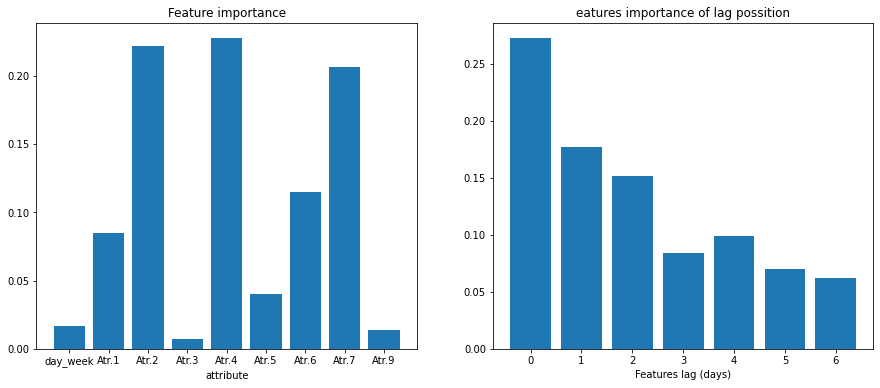

In [19]:
# get the importance of the featureregarding all lags 

basecolumns = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',  'attribute6', 'attribute7',  'attribute9']
colunmsList = device_data_f.columns.tolist()
rf_classificatior.best_estimator_.feature_importances_

def getColum_importance(base_feature):
    indexes = [colunmsList.index(base_feature)]; 
    column_importances = rf_classificatior.best_estimator_.feature_importances_[colunmsList.index(base_feature)]
    for i in range (1, number_lags):
        column_importances += rf_classificatior.best_estimator_.feature_importances_[colunmsList.index(base_feature + '_' + str(i))]
        
    return column_importances

columns_importance = []
columns_importance.append( rf_classificatior.best_estimator_.feature_importances_[colunmsList.index('day_week')])

for basecolumn in basecolumns:
    columns_importance.append( getColum_importance(basecolumn))
    

# get the importance of all fature regaring a especific lag

basecolumns = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5',  'attribute6', 'attribute7',  'attribute9']
colunmsList = device_data_f.columns.tolist()
rf_classificatior.best_estimator_.feature_importances_

def getlag_importance(lag):
    if lag > 0 :
        suffix = '_' + str(lag )
    else:
        suffix =''
    
    lag_importance =  0
    for basecolumn in basecolumns: 
        lag_importance += rf_classificatior.best_estimator_.feature_importances_[colunmsList.index(basecolumn + suffix)]
        

    return lag_importance


lags_importance = []
for lag in range(0, number_lags):
    lags_importance.append( getlag_importance(lag))


    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))    
axes[0].bar(['day_week', 'Atr.1','Atr.2','Atr.3','Atr.4','Atr.5','Atr.6','Atr.7','Atr.9'] , columns_importance)
axes.flat[0].set(xlabel='attribute', title='Feature importance')

axes[1].bar(range(0,number_lags), lags_importance)
axes.flat[1].set(xlabel='Features lag (days)', title='eatures importance of lag possition')





# Results
##  The folowing table compares  the metrics  of the The GradientBoosting and RandomForest Algorithms for the test dataset
<br>
<table style="width:70%">
    
  <tr>
      <td> </td>
      <td><strong><font size="3" color="blue">suporte vector machine</font> </strong></td>
      <td><strong><font size="3" color="blue">GradientBoosting</font> </strong></td>
      <td><strong><font size="3" color="blue">RandomForest</font>  </strong></td>
  </tr>
  <tr>
      <td><strong>Acuracy  </strong>  </td>
      <td><strong>68%</strong></td>
      <td><strong>93%</strong></td>
      <td><strong>91% </strong> </td>
  </tr>
  <tr>
      <td><strong>True positive rate </strong>  </td>
      <td><strong>36%  </strong></td>
      <td><strong>77% </strong></td>
      <td><strong>82% </strong></td>
  </tr>
    <tr>
      <td><strong>False positive rate </strong>  </td>
      <td><strong> 32 % </strong></td>
      <td><strong>6.9 %</strong></td>
       <td><strong>8.8 %</strong></td>
  </tr>
  <tr>
      <td><strong>False negative rate </strong>  </td>
      <td><strong>64% </strong></td>
      <td><strong>22.7% </strong></td>
      <td><strong>18.2% </strong></td>
  </tr>
</table>



 

# Conclusions

- The  data set is extremely unbalanced, with incostant number of samples per device and few samples of failure.
- The LSTM approche didn't achived good results.
- In order to use shallow classifiers two feature engineering have been aplyed: lag features and resampling . 
- Sinse the dataset has few samples of failures (22  in test  dataset) and the split process is randomic, the accuracy has a variation of 10% from one training to another
- The results show that GradientBoosting performed similarly to RandonForest, with a small advantage for RandonForest which is more stable and presents better results for the test dataset. Below the final results achieved by the randonForestResolve model:
   - Acuracy   91 %
   - True positives rate   82%
   - False positives rate  8.8%
   - False negatives rate  18.2%


